In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
from utils.tools import fn_dot, fn_iterate

In [38]:
def plot(f, n=1, start=0, stop=1):
    space = np.linspace(start, stop, 300)
    fig, ax = plt.subplots()
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_xlim(start, stop)
    f = f
    for i in range(n):
        ys = f(space)
        ax.plot(space, ys, label=f"f[{i+1}](x)")
        f = fn_dot(f, f)
        
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    
    ax.legend()
    fig.show()

#### Q.1
\begin{align}
    f(x) &= ax + b \\
    \implies f^{(2)}(x) &= a\cdot(ax + b) + b \\
    &= a^2 \cdot x + ab + b
\end{align}

In [31]:
a, b = 0.2, 0.4
f = lambda x: a*x+b

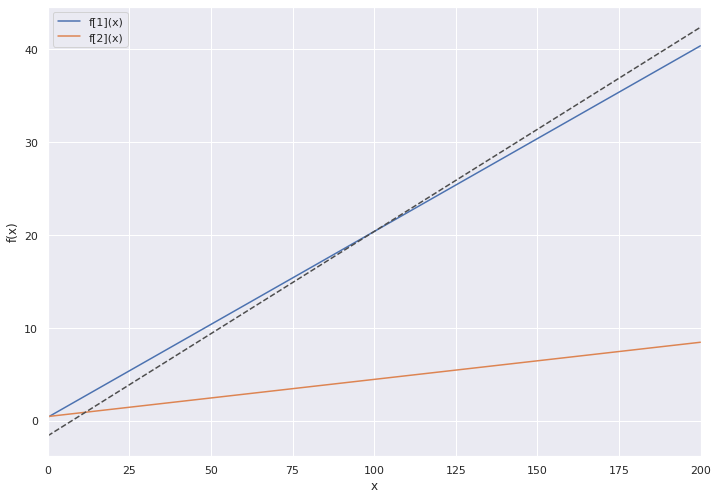

In [32]:
plot(f, n=2, start=0, stop=200)

### Logistic map

\begin{align}
    x_t \mapsto	r \cdot x_t \cdot (1-x_t)
\end{align}

In [42]:
logit = lambda r: lambda x: r*x*(1-x)

In [65]:
def plot_system(fn_builder, params, x0, n=10):
    fn = fn_builder(*params)
    t = np.linspace(0, 1)
    
    fig, ax = plt.subplots(figsize=(8.27, 8.27))
    
    ax.plot(t, fn(t), 'k', lw=2)
    b_alpha = 0.4

    x = x0
    for i in range(n):
        y = fn(x)
        alpha = b_alpha + (1-b_alpha)*(i + 1) / n 
        
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        ax.plot([x], [y], 'ok', ms=10, alpha=alpha)

        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    ax.plot(ax.get_xlim(), ax.get_ylim(), 'k', lw=2)

    
    ax.set_title(f"$lambda={', '.join([str(p) for p in params])}, \, x_0={x0}$")
    
    fig.show()

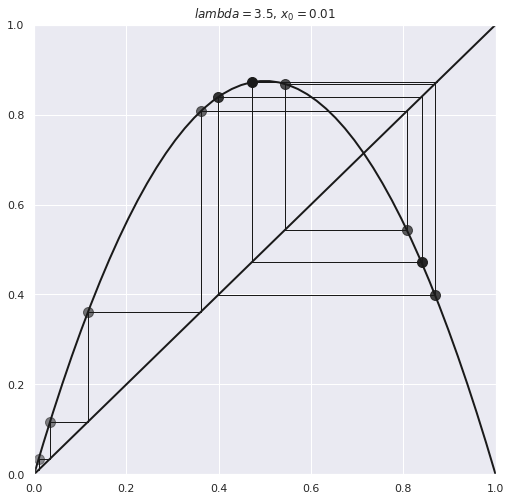

In [72]:
plot_system(logit, [3.5], .01, n=10)